<a href="https://colab.research.google.com/github/raizo2000/Machine-Learning/blob/main/Examen_V2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [49]:
#Tratamiento de datos
import pandas as pd
import numpy as np
import os
import glob

#Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings

#Preprocesasdo y Modelado
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# 1. Análisis Exploratorio de Datos
**a. Explorar la tendencia a lo largo del año para cada género:**






- **a.1 Número de libros más vendidos en cada género cada año**

In [50]:
# Importar Datos
data = pd.read_csv("Libros_x_categorias.csv")
# data.shape
# data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [51]:
df_non_fic = data[data['Genre'] == 'Non Fiction']
df_non_fic.shape

(310, 7)

In [52]:
df_non_fic.drop(['Name','Author','Reviews','Price'],1)

,User Rating,Year,Genre
0,4.7,2016,Non Fiction
2,4.7,2018,Non Fiction
4,4.8,2019,Non Fiction
8,4.7,2018,Non Fiction
11,4.6,2010,Non Fiction
...,...,...,...
539,4.2,2010,Non Fiction
546,4.7,2016,Non Fiction
547,4.7,2017,Non Fiction
548,4.7,2018,Non Fiction


In [ ]:
df_fic = data[data['Genre'] == 'Fiction']
df_fic.drop(['Name','Author','Reviews','Price'],1)

,User Rating,Year,Genre
1,4.6,2011,Fiction
3,4.7,2017,Fiction
5,4.4,2011,Fiction
6,4.7,2014,Fiction
7,4.7,2017,Fiction
...,...,...,...
541,4.8,2014,Fiction
542,4.8,2015,Fiction
543,4.8,2016,Fiction
544,4.8,2017,Fiction


In [ ]:
df_fic_byyear = df_fic.groupby(['Year']).mean()

mm_scaler = preprocessing.MinMaxScaler()
df_fic_mm = mm_scaler.fit_transform(df_fic_byyear)
df_fic_mm = pd.DataFrame(df_fic_mm, columns=df_fic_byyear.columns)
df_fic_mm.index = df_fic_byyear.index

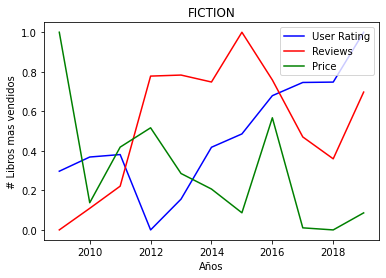

In [ ]:
plt.plot(df_fic_mm.index,df_fic_mm['User Rating'], color='b', label = 'User Rating')
plt.plot(df_fic_mm.index,df_fic_mm['Reviews'], color='r',label = 'Reviews')
plt.plot(df_fic_mm.index,df_fic_mm['Price'], color='g',label = 'Price')
plt.xlabel('Años')
plt.ylabel('# Libros mas vendidos')
plt.title('FICTION')
plt.legend()
plt.show()

In [ ]:
df_non_fic_byyear = df_non_fic.groupby(['Year']).mean()

mm_scaler = preprocessing.MinMaxScaler()
df_non_fic_mm = mm_scaler.fit_transform(df_non_fic_byyear)
df_non_fic_mm = pd.DataFrame(df_non_fic_mm, columns = df_non_fic_byyear.columns)
df_non_fic_mm.index = df_non_fic_byyear.index

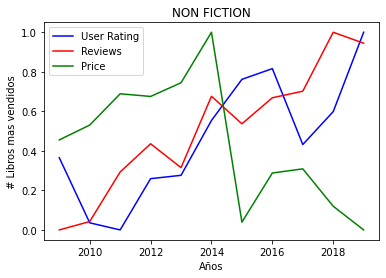

In [ ]:
plt.plot(df_non_fic_mm.index,df_non_fic_mm['User Rating'], color='b', label = 'User Rating')
plt.plot(df_non_fic_mm.index,df_non_fic_mm['Reviews'], color='r',label = 'Reviews')
plt.plot(df_non_fic_mm.index,df_non_fic_mm['Price'], color='g',label = 'Price')
plt.xlabel('Años')
plt.ylabel('# Libros mas vendidos')
plt.title('NON FICTION')
plt.legend()
plt.show()

- **a.2 Precio promedio, reseñas y calificación de los usuarios a lo largo del año por género**

In [ ]:
df_fic_byyear = df_fic.groupby(['Year']).mean()
df_fic_byyear.to_csv('Mean_Data_Fiction.csv')
df_fic_byyear

,User Rating,Reviews,Price
Year,,,
2009,4.591667,6534.333333,15.583333
2010,4.615000,8409.250000,9.700000
2011,4.619048,10335.285714,11.619048
2012,4.495238,19896.238095,12.285714
2013,4.545833,19986.833333,10.708333
2014,4.631034,19382.862069,10.172414
2015,4.652941,23706.117647,9.352941
2016,4.715789,19563.263158,12.631579
2017,4.737500,14611.833333,8.833333


In [ ]:
df_non_fic_byyear = df_non_fic.groupby(['Year']).mean()
df_non_fic_byyear.to_csv('Mean_Data_NonFiction.csv')
df_non_fic_byyear

,User Rating,Reviews,Price
Year,,,
2009,4.576923,3026.230769,15.230769
2010,4.520000,3526.533333,16.000000
2011,4.513793,6482.758621,17.620690
2012,4.558621,8162.931034,17.482759
2013,4.561538,6739.346154,18.192308
2014,4.609524,10994.952381,20.809524
2015,4.645455,9353.484848,10.969697
2016,4.654839,10906.387097,13.516129
2017,4.588462,11297.538462,13.730769


**b. Analizar las variables por autor**

- **b.1 Construir la tabla de autores**


In [ ]:
# read specific columns of csv file using Pandas 
df = pd.read_csv("Libros_x_categorias.csv", usecols = ['Author'])

df.to_csv('Author.csv')
df

,Author
0,JJ Smith
1,Stephen King
2,Jordan B. Peterson
3,George Orwell
4,National Geographic Kids
...,...
545,Jeff Kinney
546,Jen Sincero
547,Jen Sincero
548,Jen Sincero


- **b.2  Definir función para contar el número de libros que un autor tiene en la lista de best-sellers**


In [ ]:
def author_best_seller(best_sellers_list):
  n = best_sellers_list['Author'].value_counts()
  return n


In [ ]:
data['best_sellers'] = data['Reviews']*data['Price']
df_best_sellers = data.drop(['Name','Reviews','Price','User Rating','Genre','Year'],1).sort_values(by='best_sellers',ascending=False)
df_best_sellers = df_best_sellers.drop(df_best_sellers[df_best_sellers['best_sellers']==0].index)

df_best_sellers


,Author,best_sellers
382,Paula Hawkins,1430028
338,Paulo Coelho,1396161
534,Delia Owens,1317615
70,American Psychiatric Association,701295
69,American Psychiatric Association,701295
...,...,...
300,Zhi Gang Sha,3740
264,Rick Riordan,1096
11,Larry Schweikart,920
91,David Zinczenko,720


In [ ]:
n = author_best_seller(df_best_sellers) 
n.to_csv('Best_Sellers_Books.csv')
n.head()

Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
Dr. Seuss                              9
Name: Author, dtype: int64

- **b.3  Lista de autores con al menos 3 libros más vendidos**


In [ ]:
data_book = pd.read_csv("Best_Sellers_Books.csv")
df_list = data_book[data_book['Author'] >= 3]
df_list.shape
df_list.head()

,Unnamed: 0,Author
0,Suzanne Collins,11
1,Gary Chapman,11
2,Rick Riordan,11
3,American Psychological Association,10
4,Dr. Seuss,9


**c. Distribuciones variables**

- c.1 Explorar la distribución de Price

In [53]:
#Debemos ver cómo interpreta Pandas los datos, es decir, qué tipo de dato le asigna a cada uno.
print(data.dtypes)
data['Price'].describe()

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object


count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

Text(0, 0.5, 'Conteo')

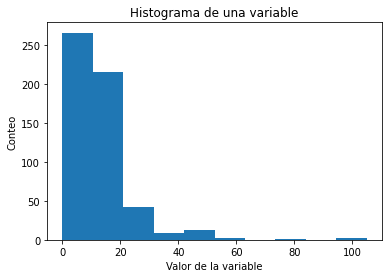

In [54]:
#Crear un histograma para ver la distribución de una variable. Escogemos Price
data['Price'].plot.hist()
plt.title('Histograma de una variable')
plt.xlabel('Valor de la variable')
plt.ylabel('Conteo')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


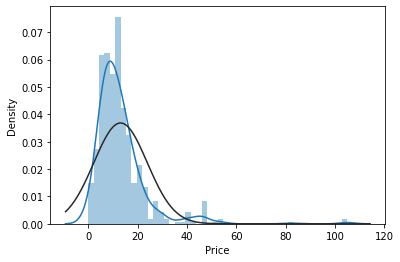

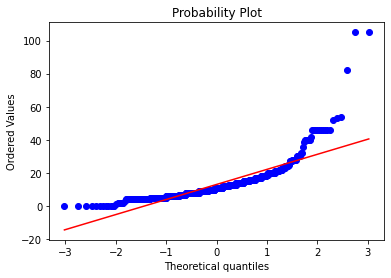

In [55]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(data['Price'], fit = norm);
fig = plt.figure()
res = stats.probplot(data['Price'], plot = plt)

In [56]:
#De estos gráficos se desprende que 'Price' no conforma una distribución normal. Muestra picos, asimetría positiva y no sigue la línea diagonal; aunque una simple transformación de datos puede resolver el problema.
#como price es entero existen valor de 0 y negativos al momento de transformar la data para que se adecue a la normal
#por ese motivo transformamos el dato a float64
data['Price'] = data['Price'].astype(np.float64)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


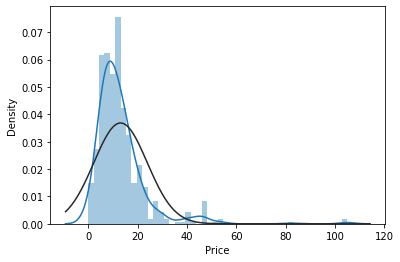

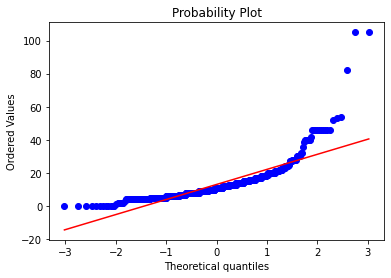

In [57]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:
sns.distplot(data['Price'], fit = norm)
fig = plt.figure()
res = stats.probplot(data['Price'], plot = plt)

In [58]:
from scipy import stats
#Otra forma de asegurarse de que se sigue una distribución normal es realizando un test de normalidad.
columnas_numericas = data.select_dtypes(['int', 'float']).columns
for num_col in columnas_numericas:
    _, pval = stats.normaltest(data[num_col])
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))

Columna User Rating no sigue una distribución normal
Columna Reviews no sigue una distribución normal
Columna Price no sigue una distribución normal
Columna Year no sigue una distribución normal


In [59]:
#Trasformamos user rating a normal
# Transformación de los datos:
data['User Rating'] = np.log(data['User Rating'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


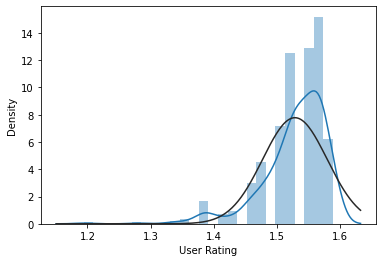

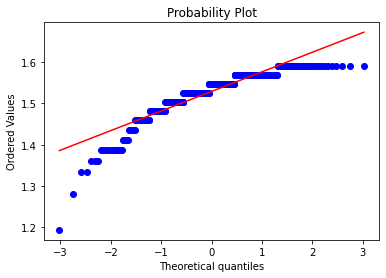

In [60]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados para User Rating:

sns.distplot(data['User Rating'], fit = norm);
fig = plt.figure()
res = stats.probplot(data['User Rating'], plot = plt)

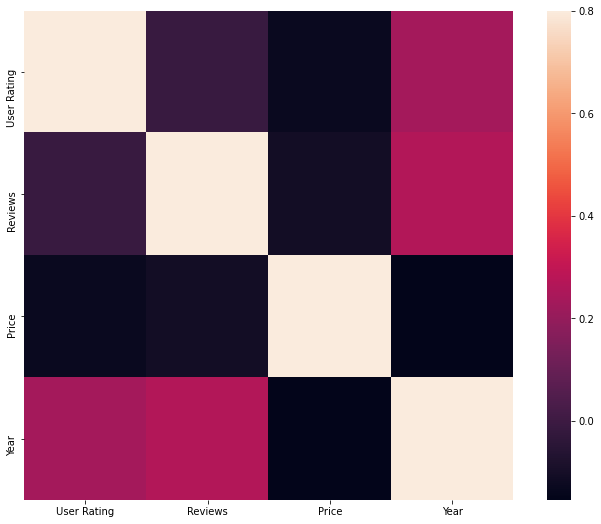

In [61]:
# Matriz de correlación:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**d. Explorando las relaciones entre las variables a través del conjunto de datos**

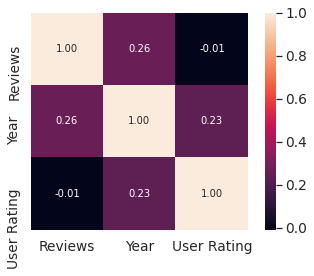

In [62]:
# Matriz de correlación
k = 3 # Número de variables.
cols = corrmat.nlargest(k, 'Reviews')['Reviews'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

- **d.1  Relación entre las revisiones y la clasificación de los usuarios, comparada con el género**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


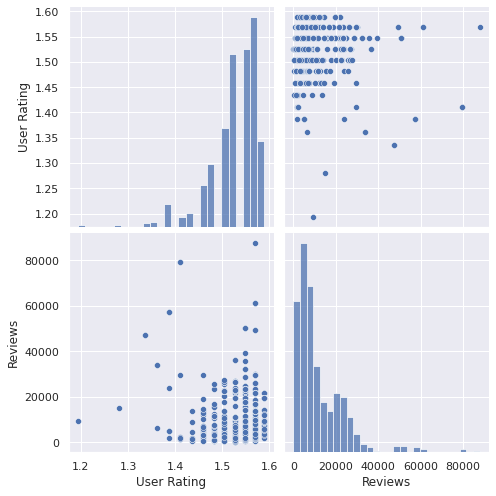

In [ ]:
sns.set()
cols = ['User Rating', 'Reviews', 'Genre']
sns.pairplot(data[cols], size = 3.5)
plt.show();

- **d.2  Explorar la relación entre el precio y la valoración de los usuarios, comparada con el género**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


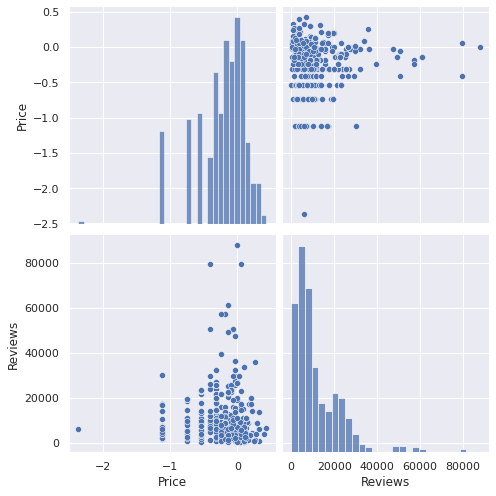

In [ ]:
sns.set()
cols = ['Price', 'Reviews', 'Genre']
sns.pairplot(data[cols], size = 3.5)
plt.show();

**e. Explorar las relaciones entre las variables cuando son agrupadas por el autor**

In [ ]:
libros_dataframe = pd.read_csv('Libros_x_categorias.csv')
libros_dataframe = libros_dataframe.drop(['Name'], axis=1)
libros_dataframe

,Author,User Rating,Reviews,Price,Year,Genre
0,JJ Smith,4.7,17350,8,2016,Non Fiction
1,Stephen King,4.6,2052,22,2011,Fiction
2,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,George Orwell,4.7,21424,6,2017,Fiction
4,National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...
545,Jeff Kinney,4.9,9413,8,2019,Fiction
546,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,Jen Sincero,4.7,14331,8,2018,Non Fiction


- **e.1 ax1 Explora la relación entre el total de reseñas que tiene un autor y la calificación promedio de usuario de ese autor**


In [ ]:
#Formamos nustras series con los datos que necesitamos
autores_series_rating = libros_dataframe.iloc[:][['Author','User Rating']]
autores_series_reviews = libros_dataframe.iloc[:][['Author','Reviews']]
autores_rating_mean_series = autores_series_rating.groupby(['Author']).mean()
autores_reviws_count_series = autores_series_reviews.groupby(['Author']).sum()
review_counts_vs_rating_mean = pd.merge(autores_rating_mean_series,autores_reviws_count_series, on='Author')
review_counts_vs_rating_mean

,User Rating,Reviews
Author,,
Abraham Verghese,4.600000,9732
Adam Gasiewski,4.400000,3113
Adam Mansbach,4.800000,9568
Adir Levy,4.800000,8170
Admiral William H. McRaven,4.700000,10199
...,...,...
Walter Isaacson,4.566667,18668
William Davis,4.400000,14994
William P. Young,4.600000,39440


In [ ]:
#Normalizamos el dataset
mm_scaler = preprocessing.MinMaxScaler()
x_mm = mm_scaler.fit_transform(review_counts_vs_rating_mean)
review_counts_vs_rating_mean_mm = pd.DataFrame(x_mm, columns=['User Rating','Reviews'])
review_counts_vs_rating_mean_mm.index = review_counts_vs_rating_mean.index
review_counts_vs_rating_mean_mm

,User Rating,Reviews
Author,,
Abraham Verghese,0.700000,0.034074
Adam Gasiewski,0.500000,0.010271
Adam Mansbach,0.900000,0.033484
Adir Levy,0.900000,0.028457
Admiral William H. McRaven,0.800000,0.035753
...,...,...
Walter Isaacson,0.666667,0.066209
William Davis,0.500000,0.052997
William P. Young,0.700000,0.140910


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


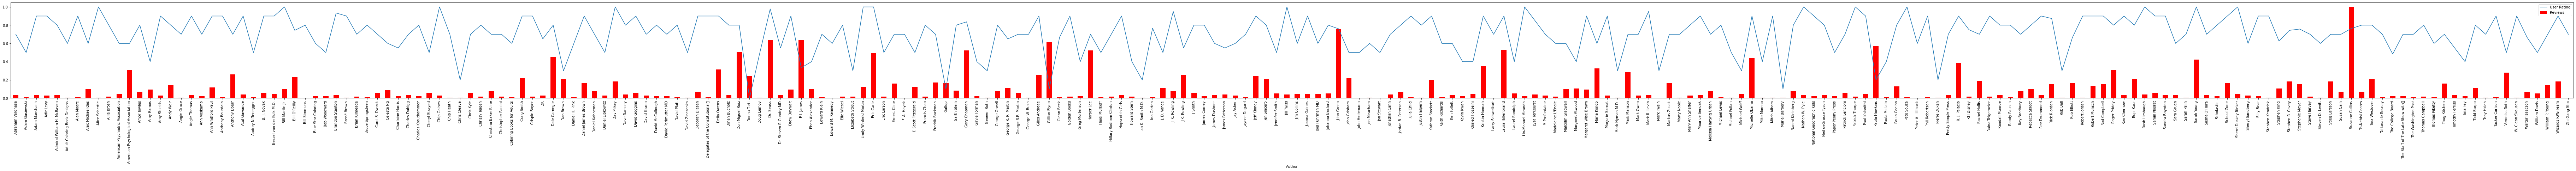

In [ ]:
#Graficamos 
plt.rcParams["figure.figsize"] = [130,5]
fig = plt.figure()
review_counts_vs_rating_mean_mm['User Rating'].plot(kind = 'line')
review_counts_vs_rating_mean_mm['Reviews'].plot(kind = 'bar', color='r')
plt.legend()

- **e.2  ax2 Explorar la relación entre el precio promedio de los libros más vendidos de un autor y la calificación de usuario promedio de ese autor.**


In [ ]:
#Formamos nustras series con los datos que necesitamos
#Precio promedio de los libros mas vendidos por el autor
autores_series_price = libros_dataframe.iloc[:][['Author','Price']]
autores_series_price = autores_series_price.sort_values(by=['Price'], ascending=False, ignore_index=True)
autores_series_price = autores_series_price.iloc[:11]
autores_price_mean_series = autores_series_price.groupby(['Author']).mean()
autores_price_mean_series

,Price
Author,
American Psychiatric Association,105
American Psychological Association,46
Bill Simmons,53
J. K. Rowling,52
Lin-Manuel Miranda,54
Stephenie Meyer,82


In [ ]:
autores_series_rating = libros_dataframe.iloc[:][['Author','User Rating']]
autores_series_rating_series = autores_series_rating.groupby(['Author']).mean()
autores_series_rating_series = pd.merge(autores_series_rating_series,autores_price_mean_series, on ='Author')
autores_series_rating_series

,User Rating,Price
Author,,
American Psychiatric Association,4.500000,105
American Psychological Association,4.500000,46
Bill Simmons,4.700000,53
J. K. Rowling,4.850000,52
Lin-Manuel Miranda,4.900000,54
Stephenie Meyer,4.657143,82


In [ ]:
#Normalizamos dataset
mm_scaler = preprocessing.MinMaxScaler()
x_mm = mm_scaler.fit_transform(autores_series_rating_series)
analisis = pd.DataFrame(x_mm, columns=['User Rating','Price'])


In [ ]:
analisis.index =  autores_series_rating_series.index
analisis.plot(figsize= [10,5])
plt.xticks(rotation=45)

# 2. Predecir - Modelo de Machine Learning
**a. Explorar la tendencia a lo largo del año para cada género:**

- Todos los datos deben ser numéricos para entrenar y probar la red
- La salida es determinar cuál es el autor de un libro
-Dividir las características de entrada y de destino
- Codificar de las etiquetas
- Dividir datos de entrenamiento y prueba
- Entrenar el modelo y encontrar su precisión >= 85,6
- Predecir


In [ ]:
libros_dataframe = pd.read_csv('Libros_x_categorias.csv')
libros_dataframe = libros_dataframe.drop(['Name'], axis=1)
libros_dataframe

,Author,User Rating,Reviews,Price,Year,Genre
0,JJ Smith,4.7,17350,8,2016,Non Fiction
1,Stephen King,4.6,2052,22,2011,Fiction
2,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,George Orwell,4.7,21424,6,2017,Fiction
4,National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...
545,Jeff Kinney,4.9,9413,8,2019,Fiction
546,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [ ]:
#Creo variables x y

dummys_year = pd.get_dummies(libros_dataframe['Year'])
dummys_sex = pd.get_dummies(libros_dataframe['Genre'])
series = libros_dataframe[['User Rating','Reviews','Price']]
x = pd.concat([series,dummys_year,dummys_sex], axis=1)

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(libros_dataframe['Author'])

In [ ]:
#Normalizamos el dataset
mm_scaler = preprocessing.MinMaxScaler()
x_mm = mm_scaler.fit_transform(x)
x = pd.DataFrame(x_mm, columns=x.columns)

In [ ]:
#Dividimos datos entre los de entrenamiento y de pruebas
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0, train_size= 0.75)

In [ ]:
#Entrenamos el modelo
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [ ]:
#Calculamos Score
tree_one_accuracy = round(tree_one.score(x_test, y_test), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.3841


In [ ]:
#Predecimos
predictions = tree_one.predict(x_test)

In [ ]:
#Random Forest
randForest = RandomForestClassifier()
randForest.fit(x_train, y_train)
y_pred = randForest.predict(x_test)

In [ ]:
#Score
randForest_accuracy = round(randForest.score(x_test, y_test), 4)
print('Accuracy: %0.4f' % (randForest_accuracy))

Accuracy: 0.3406
